# Importing the dataset

In [1]:
import numpy as np
import pandas as pd

df=pd.read_csv('data.csv')
df

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,59,1,1,140,221,1,164,1,0.0,2,0,2,1
964,60,1,0,125,258,0,141,1,2.8,1,1,3,0
965,47,1,0,110,275,0,118,1,1.0,1,1,2,0
966,50,0,0,110,254,0,159,0,0.0,2,0,2,1


In [2]:
df=df.values

In [3]:
df

array([[52.,  1.,  0., ...,  2.,  3.,  0.],
       [53.,  1.,  0., ...,  0.,  3.,  0.],
       [70.,  1.,  0., ...,  0.,  3.,  0.],
       ...,
       [47.,  1.,  0., ...,  1.,  2.,  0.],
       [50.,  0.,  0., ...,  0.,  2.,  1.],
       [54.,  1.,  0., ...,  1.,  3.,  0.]])

In [4]:
data=df[:,0:12]
target=df[:,12]

In [5]:
data

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [47.,  1.,  0., ...,  1.,  1.,  2.],
       [50.,  0.,  0., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [6]:
target

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0.

In [7]:
from sklearn.preprocessing import MinMaxScaler

target=np.reshape(target, (-1,1))

scaler_data = MinMaxScaler(feature_range=(0,1))
scaler_target = MinMaxScaler()

data_scaled=scaler_data.fit_transform(data)
target_scaled=scaler_target.fit_transform(target)

In [8]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data_scaled, target_scaled,test_size=0.1)

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

checkpoint = ModelCheckpoint('models/model-{epoch:03d}.model',monitor='val_loss',save_best_only=True,mode='auto')


In [11]:
model.fit(train_data, train_target, epochs=500, batch_size=16, validation_split=0.1,callbacks=[checkpoint])

Epoch 1/500


25/49 [==============>...............] - ETA: 0s - loss: 0.6893 - accuracy: 0.5725 INFO:tensorflow:Assets written to: models\model-001.model\assets


INFO:tensorflow:Assets written to: models\model-001.model\assets


49/49 [==============================] - 2s 22ms/step - loss: 0.6611 - accuracy: 0.6322 - val_loss: 0.5863 - val_accuracy: 0.8182
Epoch 2/500
29/49 [================>.............] - ETA: 0s - loss: 0.5545 - accuracy: 0.7608INFO:tensorflow:Assets written to: models\model-002.model\assets


INFO:tensorflow:Assets written to: models\model-002.model\assets


49/49 [==============================] - 1s 15ms/step - loss: 0.5336 - accuracy: 0.7842 - val_loss: 0.4901 - val_accuracy: 0.8068
Epoch 3/500
28/49 [================>.............] - ETA: 0s - loss: 0.4610 - accuracy: 0.7946INFO:tensorflow:Assets written to: models\model-003.model\assets


INFO:tensorflow:Assets written to: models\model-003.model\assets


49/49 [==============================] - 1s 15ms/step - loss: 0.4558 - accuracy: 0.7905 - val_loss: 0.4408 - val_accuracy: 0.8182
Epoch 4/500
49/49 [==============================] - 0s 3ms/step - loss: 0.4388 - accuracy: 0.8059 - val_loss: 0.4504 - val_accuracy: 0.7955
Epoch 5/500
28/49 [================>.............] - ETA: 0s - loss: 0.3850 - accuracy: 0.8371INFO:tensorflow:Assets written to: models\model-005.model\assets


INFO:tensorflow:Assets written to: models\model-005.model\assets


49/49 [==============================] - 1s 13ms/step - loss: 0.4035 - accuracy: 0.8314 - val_loss: 0.3986 - val_accuracy: 0.8182
Epoch 6/500
25/49 [==============>...............] - ETA: 0s - loss: 0.3922 - accuracy: 0.8050INFO:tensorflow:Assets written to: models\model-006.model\assets


INFO:tensorflow:Assets written to: models\model-006.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.4052 - accuracy: 0.8110 - val_loss: 0.3919 - val_accuracy: 0.8295
Epoch 7/500
26/49 [==============>...............] - ETA: 0s - loss: 0.3960 - accuracy: 0.8221INFO:tensorflow:Assets written to: models\model-007.model\assets


INFO:tensorflow:Assets written to: models\model-007.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.3858 - accuracy: 0.8314 - val_loss: 0.3782 - val_accuracy: 0.8409
Epoch 8/500
29/49 [================>.............] - ETA: 0s - loss: 0.3695 - accuracy: 0.8556INFO:tensorflow:Assets written to: models\model-008.model\assets


INFO:tensorflow:Assets written to: models\model-008.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.3829 - accuracy: 0.8365 - val_loss: 0.3736 - val_accuracy: 0.8409
Epoch 9/500
26/49 [==============>...............] - ETA: 0s - loss: 0.3406 - accuracy: 0.8750INFO:tensorflow:Assets written to: models\model-009.model\assets


INFO:tensorflow:Assets written to: models\model-009.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.3825 - accuracy: 0.8391 - val_loss: 0.3639 - val_accuracy: 0.8523
Epoch 10/500
27/49 [===============>..............] - ETA: 0s - loss: 0.4074 - accuracy: 0.8333INFO:tensorflow:Assets written to: models\model-010.model\assets


INFO:tensorflow:Assets written to: models\model-010.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.3749 - accuracy: 0.8570 - val_loss: 0.3487 - val_accuracy: 0.8636
Epoch 11/500
26/49 [==============>...............] - ETA: 0s - loss: 0.3654 - accuracy: 0.8462INFO:tensorflow:Assets written to: models\model-011.model\assets


INFO:tensorflow:Assets written to: models\model-011.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.3675 - accuracy: 0.8480 - val_loss: 0.3428 - val_accuracy: 0.8523
Epoch 12/500
26/49 [==============>...............] - ETA: 0s - loss: 0.3652 - accuracy: 0.8413INFO:tensorflow:Assets written to: models\model-012.model\assets


INFO:tensorflow:Assets written to: models\model-012.model\assets


49/49 [==============================] - 1s 18ms/step - loss: 0.3561 - accuracy: 0.8570 - val_loss: 0.3395 - val_accuracy: 0.8636
Epoch 13/500
49/49 [==============================] - 0s 3ms/step - loss: 0.3457 - accuracy: 0.8455 - val_loss: 0.3435 - val_accuracy: 0.8295
Epoch 14/500
25/49 [==============>...............] - ETA: 0s - loss: 0.3299 - accuracy: 0.8500INFO:tensorflow:Assets written to: models\model-014.model\assets


INFO:tensorflow:Assets written to: models\model-014.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.3477 - accuracy: 0.8467 - val_loss: 0.3219 - val_accuracy: 0.8523
Epoch 15/500
47/49 [===========================>..] - ETA: 0s - loss: 0.3373 - accuracy: 0.8471INFO:tensorflow:Assets written to: models\model-015.model\assets


INFO:tensorflow:Assets written to: models\model-015.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.3374 - accuracy: 0.8467 - val_loss: 0.3188 - val_accuracy: 0.8636
Epoch 16/500
49/49 [==============================] - 0s 3ms/step - loss: 0.3360 - accuracy: 0.8544 - val_loss: 0.3237 - val_accuracy: 0.8636
Epoch 17/500
29/49 [================>.............] - ETA: 0s - loss: 0.3432 - accuracy: 0.8621INFO:tensorflow:Assets written to: models\model-017.model\assets


INFO:tensorflow:Assets written to: models\model-017.model\assets


49/49 [==============================] - 1s 13ms/step - loss: 0.3318 - accuracy: 0.8595 - val_loss: 0.3120 - val_accuracy: 0.8636
Epoch 18/500
49/49 [==============================] - 0s 3ms/step - loss: 0.3278 - accuracy: 0.8595 - val_loss: 0.3151 - val_accuracy: 0.8864
Epoch 19/500
30/49 [=================>............] - ETA: 0s - loss: 0.3228 - accuracy: 0.8625INFO:tensorflow:Assets written to: models\model-019.model\assets


INFO:tensorflow:Assets written to: models\model-019.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.3295 - accuracy: 0.8608 - val_loss: 0.2996 - val_accuracy: 0.8750
Epoch 20/500
27/49 [===============>..............] - ETA: 0s - loss: 0.3202 - accuracy: 0.8681INFO:tensorflow:Assets written to: models\model-020.model\assets


INFO:tensorflow:Assets written to: models\model-020.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.3200 - accuracy: 0.8685 - val_loss: 0.2985 - val_accuracy: 0.8864
Epoch 21/500
27/49 [===============>..............] - ETA: 0s - loss: 0.3056 - accuracy: 0.8843INFO:tensorflow:Assets written to: models\model-021.model\assets


INFO:tensorflow:Assets written to: models\model-021.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.3102 - accuracy: 0.8787 - val_loss: 0.2808 - val_accuracy: 0.8636
Epoch 22/500
49/49 [==============================] - 0s 3ms/step - loss: 0.3121 - accuracy: 0.8685 - val_loss: 0.3042 - val_accuracy: 0.8977
Epoch 23/500
45/49 [==========================>...] - ETA: 0s - loss: 0.2858 - accuracy: 0.8847INFO:tensorflow:Assets written to: models\model-023.model\assets


INFO:tensorflow:Assets written to: models\model-023.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.2876 - accuracy: 0.8799 - val_loss: 0.2684 - val_accuracy: 0.8636
Epoch 24/500
49/49 [==============================] - 0s 3ms/step - loss: 0.2973 - accuracy: 0.8723 - val_loss: 0.2711 - val_accuracy: 0.8864
Epoch 25/500
29/49 [================>.............] - ETA: 0s - loss: 0.2715 - accuracy: 0.8901INFO:tensorflow:Assets written to: models\model-025.model\assets


INFO:tensorflow:Assets written to: models\model-025.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.2907 - accuracy: 0.8761 - val_loss: 0.2651 - val_accuracy: 0.8977
Epoch 26/500
49/49 [==============================] - 0s 2ms/step - loss: 0.2971 - accuracy: 0.8799 - val_loss: 0.2659 - val_accuracy: 0.8864
Epoch 27/500
30/49 [=================>............] - ETA: 0s - loss: 0.2871 - accuracy: 0.8813INFO:tensorflow:Assets written to: models\model-027.model\assets


INFO:tensorflow:Assets written to: models\model-027.model\assets


49/49 [==============================] - 1s 18ms/step - loss: 0.2888 - accuracy: 0.8799 - val_loss: 0.2614 - val_accuracy: 0.9091
Epoch 28/500
25/49 [==============>...............] - ETA: 0s - loss: 0.2897 - accuracy: 0.8925INFO:tensorflow:Assets written to: models\model-028.model\assets


INFO:tensorflow:Assets written to: models\model-028.model\assets


49/49 [==============================] - 1s 15ms/step - loss: 0.2812 - accuracy: 0.8966 - val_loss: 0.2572 - val_accuracy: 0.8977
Epoch 29/500
25/49 [==============>...............] - ETA: 0s - loss: 0.2694 - accuracy: 0.9025INFO:tensorflow:Assets written to: models\model-029.model\assets


INFO:tensorflow:Assets written to: models\model-029.model\assets


49/49 [==============================] - 1s 15ms/step - loss: 0.2713 - accuracy: 0.8914 - val_loss: 0.2517 - val_accuracy: 0.8864
Epoch 30/500
49/49 [==============================] - 0s 3ms/step - loss: 0.2701 - accuracy: 0.8991 - val_loss: 0.2527 - val_accuracy: 0.8977
Epoch 31/500
30/49 [=================>............] - ETA: 0s - loss: 0.2719 - accuracy: 0.8875INFO:tensorflow:Assets written to: models\model-031.model\assets


INFO:tensorflow:Assets written to: models\model-031.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.2625 - accuracy: 0.8953 - val_loss: 0.2393 - val_accuracy: 0.9091
Epoch 32/500
43/49 [=========================>....] - ETA: 0s - loss: 0.2627 - accuracy: 0.8939INFO:tensorflow:Assets written to: models\model-032.model\assets


INFO:tensorflow:Assets written to: models\model-032.model\assets


49/49 [==============================] - 1s 15ms/step - loss: 0.2781 - accuracy: 0.8851 - val_loss: 0.2345 - val_accuracy: 0.9091
Epoch 33/500
49/49 [==============================] - 0s 3ms/step - loss: 0.2752 - accuracy: 0.8838 - val_loss: 0.2373 - val_accuracy: 0.9091
Epoch 34/500
49/49 [==============================] - 0s 3ms/step - loss: 0.2521 - accuracy: 0.9004 - val_loss: 0.2402 - val_accuracy: 0.9205
Epoch 35/500
33/49 [===================>..........] - ETA: 0s - loss: 0.2487 - accuracy: 0.9091INFO:tensorflow:Assets written to: models\model-035.model\assets


INFO:tensorflow:Assets written to: models\model-035.model\assets


49/49 [==============================] - 1s 13ms/step - loss: 0.2570 - accuracy: 0.9042 - val_loss: 0.2186 - val_accuracy: 0.8977
Epoch 36/500
49/49 [==============================] - 0s 3ms/step - loss: 0.2640 - accuracy: 0.8774 - val_loss: 0.2207 - val_accuracy: 0.9205
Epoch 37/500
49/49 [==============================] - 0s 3ms/step - loss: 0.2519 - accuracy: 0.8978 - val_loss: 0.2286 - val_accuracy: 0.8977
Epoch 38/500
49/49 [==============================] - 0s 3ms/step - loss: 0.2512 - accuracy: 0.8966 - val_loss: 0.2267 - val_accuracy: 0.8977
Epoch 39/500
49/49 [==============================] - 0s 2ms/step - loss: 0.2452 - accuracy: 0.9004 - val_loss: 0.2257 - val_accuracy: 0.9205
Epoch 40/500
26/49 [==============>...............] - ETA: 0s - loss: 0.2597 - accuracy: 0.8894INFO:tensorflow:Assets written to: models\model-040.model\assets


INFO:tensorflow:Assets written to: models\model-040.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.2422 - accuracy: 0.9042 - val_loss: 0.2165 - val_accuracy: 0.9091
Epoch 41/500
26/49 [==============>...............] - ETA: 0s - loss: 0.2679 - accuracy: 0.8870INFO:tensorflow:Assets written to: models\model-041.model\assets


INFO:tensorflow:Assets written to: models\model-041.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.2331 - accuracy: 0.9029 - val_loss: 0.2084 - val_accuracy: 0.9091
Epoch 42/500
30/49 [=================>............] - ETA: 0s - loss: 0.2512 - accuracy: 0.9000INFO:tensorflow:Assets written to: models\model-042.model\assets


INFO:tensorflow:Assets written to: models\model-042.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.2487 - accuracy: 0.8966 - val_loss: 0.1992 - val_accuracy: 0.9091
Epoch 43/500
49/49 [==============================] - 0s 3ms/step - loss: 0.2494 - accuracy: 0.8927 - val_loss: 0.2320 - val_accuracy: 0.8864
Epoch 44/500
30/49 [=================>............] - ETA: 0s - loss: 0.2504 - accuracy: 0.8938INFO:tensorflow:Assets written to: models\model-044.model\assets


INFO:tensorflow:Assets written to: models\model-044.model\assets


49/49 [==============================] - 1s 13ms/step - loss: 0.2282 - accuracy: 0.9055 - val_loss: 0.1987 - val_accuracy: 0.8977
Epoch 45/500
49/49 [==============================] - 0s 3ms/step - loss: 0.2195 - accuracy: 0.9132 - val_loss: 0.1988 - val_accuracy: 0.9432
Epoch 46/500
49/49 [==============================] - 0s 3ms/step - loss: 0.2303 - accuracy: 0.9042 - val_loss: 0.2461 - val_accuracy: 0.9318
Epoch 47/500
49/49 [==============================] - 0s 3ms/step - loss: 0.2178 - accuracy: 0.9119 - val_loss: 0.2043 - val_accuracy: 0.8977
Epoch 48/500
31/49 [=================>............] - ETA: 0s - loss: 0.2614 - accuracy: 0.8790INFO:tensorflow:Assets written to: models\model-048.model\assets


INFO:tensorflow:Assets written to: models\model-048.model\assets


49/49 [==============================] - 1s 15ms/step - loss: 0.2360 - accuracy: 0.8966 - val_loss: 0.1955 - val_accuracy: 0.8864
Epoch 49/500
26/49 [==============>...............] - ETA: 0s - loss: 0.2132 - accuracy: 0.9038INFO:tensorflow:Assets written to: models\model-049.model\assets


INFO:tensorflow:Assets written to: models\model-049.model\assets


49/49 [==============================] - 1s 18ms/step - loss: 0.2104 - accuracy: 0.9068 - val_loss: 0.1890 - val_accuracy: 0.9205
Epoch 50/500
49/49 [==============================] - 0s 2ms/step - loss: 0.2296 - accuracy: 0.9017 - val_loss: 0.2080 - val_accuracy: 0.8977
Epoch 51/500
29/49 [================>.............] - ETA: 0s - loss: 0.1611 - accuracy: 0.9332INFO:tensorflow:Assets written to: models\model-051.model\assets


INFO:tensorflow:Assets written to: models\model-051.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.2009 - accuracy: 0.9144 - val_loss: 0.1859 - val_accuracy: 0.8977
Epoch 52/500
49/49 [==============================] - 0s 3ms/step - loss: 0.1935 - accuracy: 0.9246 - val_loss: 0.1927 - val_accuracy: 0.9318
Epoch 53/500
26/49 [==============>...............] - ETA: 0s - loss: 0.2087 - accuracy: 0.9111INFO:tensorflow:Assets written to: models\model-053.model\assets


INFO:tensorflow:Assets written to: models\model-053.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.2123 - accuracy: 0.9080 - val_loss: 0.1832 - val_accuracy: 0.9205
Epoch 54/500
26/49 [==============>...............] - ETA: 0s - loss: 0.2057 - accuracy: 0.9159INFO:tensorflow:Assets written to: models\model-054.model\assets


INFO:tensorflow:Assets written to: models\model-054.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.2040 - accuracy: 0.9221 - val_loss: 0.1815 - val_accuracy: 0.8977
Epoch 55/500
49/49 [==============================] - 0s 3ms/step - loss: 0.1846 - accuracy: 0.9285 - val_loss: 0.1952 - val_accuracy: 0.9091
Epoch 56/500
49/49 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9132 - val_loss: 0.1830 - val_accuracy: 0.9091
Epoch 57/500
29/49 [================>.............] - ETA: 0s - loss: 0.1944 - accuracy: 0.9203INFO:tensorflow:Assets written to: models\model-057.model\assets


INFO:tensorflow:Assets written to: models\model-057.model\assets


49/49 [==============================] - 1s 13ms/step - loss: 0.1906 - accuracy: 0.9285 - val_loss: 0.1806 - val_accuracy: 0.8864
Epoch 58/500
28/49 [================>.............] - ETA: 0s - loss: 0.1660 - accuracy: 0.9263INFO:tensorflow:Assets written to: models\model-058.model\assets


INFO:tensorflow:Assets written to: models\model-058.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.1904 - accuracy: 0.9183 - val_loss: 0.1699 - val_accuracy: 0.9545
Epoch 59/500
49/49 [==============================] - 0s 3ms/step - loss: 0.1994 - accuracy: 0.9170 - val_loss: 0.1961 - val_accuracy: 0.8864
Epoch 60/500
49/49 [==============================] - 0s 2ms/step - loss: 0.1757 - accuracy: 0.9349 - val_loss: 0.1887 - val_accuracy: 0.8977
Epoch 61/500
49/49 [==============================] - 0s 3ms/step - loss: 0.1923 - accuracy: 0.9246 - val_loss: 0.1752 - val_accuracy: 0.8864
Epoch 62/500
49/49 [==============================] - 0s 2ms/step - loss: 0.1929 - accuracy: 0.9157 - val_loss: 0.1830 - val_accuracy: 0.8750
Epoch 63/500
49/49 [==============================] - 0s 3ms/step - loss: 0.1912 - accuracy: 0.9195 - val_loss: 0.1743 - val_accuracy: 0.9205
Epoch 64/500
49/49 [==============================] - 0s 2ms/step - loss: 0.1931 - accuracy: 0.9144 - val_loss: 0.1743 - val_accuracy: 0.8864
Epoch 65/500
49/49

INFO:tensorflow:Assets written to: models\model-066.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.1783 - accuracy: 0.9259 - val_loss: 0.1659 - val_accuracy: 0.9318
Epoch 67/500
49/49 [==============================] - 0s 3ms/step - loss: 0.1830 - accuracy: 0.9170 - val_loss: 0.1673 - val_accuracy: 0.8864
Epoch 68/500
49/49 [==============================] - 0s 2ms/step - loss: 0.1756 - accuracy: 0.9208 - val_loss: 0.1843 - val_accuracy: 0.9318
Epoch 69/500
49/49 [==============================] - 0s 2ms/step - loss: 0.1716 - accuracy: 0.9259 - val_loss: 0.1685 - val_accuracy: 0.8864
Epoch 70/500
26/49 [==============>...............] - ETA: 0s - loss: 0.1746 - accuracy: 0.9399INFO:tensorflow:Assets written to: models\model-070.model\assets


INFO:tensorflow:Assets written to: models\model-070.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.1723 - accuracy: 0.9246 - val_loss: 0.1588 - val_accuracy: 0.9205
Epoch 71/500
49/49 [==============================] - 0s 3ms/step - loss: 0.1699 - accuracy: 0.9285 - val_loss: 0.1669 - val_accuracy: 0.9205
Epoch 72/500
47/49 [===========================>..] - ETA: 0s - loss: 0.1654 - accuracy: 0.9375INFO:tensorflow:Assets written to: models\model-072.model\assets


INFO:tensorflow:Assets written to: models\model-072.model\assets


49/49 [==============================] - 1s 16ms/step - loss: 0.1651 - accuracy: 0.9374 - val_loss: 0.1537 - val_accuracy: 0.9318
Epoch 73/500
49/49 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9387 - val_loss: 0.1610 - val_accuracy: 0.9205
Epoch 74/500
49/49 [==============================] - 0s 3ms/step - loss: 0.1724 - accuracy: 0.9298 - val_loss: 0.1583 - val_accuracy: 0.9432
Epoch 75/500
49/49 [==============================] - 0s 2ms/step - loss: 0.1532 - accuracy: 0.9413 - val_loss: 0.1755 - val_accuracy: 0.9091
Epoch 76/500
49/49 [==============================] - 0s 2ms/step - loss: 0.1768 - accuracy: 0.9298 - val_loss: 0.1773 - val_accuracy: 0.9091
Epoch 77/500
49/49 [==============================] - 0s 2ms/step - loss: 0.1659 - accuracy: 0.9259 - val_loss: 0.1622 - val_accuracy: 0.9318
Epoch 78/500
49/49 [==============================] - 0s 2ms/step - loss: 0.1663 - accuracy: 0.9310 - val_loss: 0.1856 - val_accuracy: 0.8864
Epoch 79/500
49/49

INFO:tensorflow:Assets written to: models\model-085.model\assets


49/49 [==============================] - 1s 18ms/step - loss: 0.1392 - accuracy: 0.9438 - val_loss: 0.1517 - val_accuracy: 0.9318
Epoch 86/500
49/49 [==============================] - 0s 2ms/step - loss: 0.1728 - accuracy: 0.9234 - val_loss: 0.1758 - val_accuracy: 0.9432
Epoch 87/500
49/49 [==============================] - 0s 2ms/step - loss: 0.1543 - accuracy: 0.9285 - val_loss: 0.1565 - val_accuracy: 0.9091
Epoch 88/500
49/49 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9336 - val_loss: 0.1553 - val_accuracy: 0.9205
Epoch 89/500
33/49 [===================>..........] - ETA: 0s - loss: 0.1452 - accuracy: 0.9432INFO:tensorflow:Assets written to: models\model-089.model\assets


INFO:tensorflow:Assets written to: models\model-089.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.1399 - accuracy: 0.9464 - val_loss: 0.1424 - val_accuracy: 0.9205
Epoch 90/500
49/49 [==============================] - 0s 2ms/step - loss: 0.1495 - accuracy: 0.9361 - val_loss: 0.1523 - val_accuracy: 0.9432
Epoch 91/500
33/49 [===================>..........] - ETA: 0s - loss: 0.1396 - accuracy: 0.9451INFO:tensorflow:Assets written to: models\model-091.model\assets


INFO:tensorflow:Assets written to: models\model-091.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.1403 - accuracy: 0.9413 - val_loss: 0.1399 - val_accuracy: 0.9432
Epoch 92/500
49/49 [==============================] - 0s 2ms/step - loss: 0.1451 - accuracy: 0.9374 - val_loss: 0.1476 - val_accuracy: 0.9091
Epoch 93/500
30/49 [=================>............] - ETA: 0s - loss: 0.1547 - accuracy: 0.9458INFO:tensorflow:Assets written to: models\model-093.model\assets


INFO:tensorflow:Assets written to: models\model-093.model\assets


49/49 [==============================] - 1s 13ms/step - loss: 0.1514 - accuracy: 0.9425 - val_loss: 0.1374 - val_accuracy: 0.9318
Epoch 94/500
49/49 [==============================] - 0s 2ms/step - loss: 0.1329 - accuracy: 0.9451 - val_loss: 0.1398 - val_accuracy: 0.9205
Epoch 95/500
49/49 [==============================] - 0s 2ms/step - loss: 0.1327 - accuracy: 0.9489 - val_loss: 0.1388 - val_accuracy: 0.9545
Epoch 96/500
29/49 [================>.............] - ETA: 0s - loss: 0.1130 - accuracy: 0.9591INFO:tensorflow:Assets written to: models\model-096.model\assets


INFO:tensorflow:Assets written to: models\model-096.model\assets


49/49 [==============================] - 1s 15ms/step - loss: 0.1201 - accuracy: 0.9527 - val_loss: 0.1350 - val_accuracy: 0.9432
Epoch 97/500
28/49 [================>.............] - ETA: 0s - loss: 0.1181 - accuracy: 0.9487INFO:tensorflow:Assets written to: models\model-097.model\assets


INFO:tensorflow:Assets written to: models\model-097.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.1295 - accuracy: 0.9387 - val_loss: 0.1276 - val_accuracy: 0.9432
Epoch 98/500
49/49 [==============================] - 0s 2ms/step - loss: 0.1430 - accuracy: 0.9438 - val_loss: 0.1864 - val_accuracy: 0.8750
Epoch 99/500
49/49 [==============================] - 0s 3ms/step - loss: 0.1292 - accuracy: 0.9476 - val_loss: 0.1531 - val_accuracy: 0.9318
Epoch 100/500
34/49 [===================>..........] - ETA: 0s - loss: 0.1332 - accuracy: 0.9467INFO:tensorflow:Assets written to: models\model-100.model\assets


INFO:tensorflow:Assets written to: models\model-100.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.1361 - accuracy: 0.9425 - val_loss: 0.1196 - val_accuracy: 0.9318
Epoch 101/500
49/49 [==============================] - 0s 4ms/step - loss: 0.1314 - accuracy: 0.9413 - val_loss: 0.1511 - val_accuracy: 0.9091
Epoch 102/500
49/49 [==============================] - 0s 4ms/step - loss: 0.1174 - accuracy: 0.9579 - val_loss: 0.1319 - val_accuracy: 0.9318
Epoch 103/500
49/49 [==============================] - 0s 3ms/step - loss: 0.1297 - accuracy: 0.9489 - val_loss: 0.1488 - val_accuracy: 0.9205
Epoch 104/500
49/49 [==============================] - 0s 3ms/step - loss: 0.1218 - accuracy: 0.9579 - val_loss: 0.1524 - val_accuracy: 0.9318
Epoch 105/500
49/49 [==============================] - 0s 3ms/step - loss: 0.1207 - accuracy: 0.9489 - val_loss: 0.1445 - val_accuracy: 0.9659
Epoch 106/500
49/49 [==============================] - 0s 3ms/step - loss: 0.1299 - accuracy: 0.9451 - val_loss: 0.1393 - val_accuracy: 0.9432
Epoch 107/50

INFO:tensorflow:Assets written to: models\model-119.model\assets


49/49 [==============================] - 1s 15ms/step - loss: 0.1196 - accuracy: 0.9502 - val_loss: 0.1009 - val_accuracy: 0.9432
Epoch 120/500
49/49 [==============================] - 0s 3ms/step - loss: 0.1037 - accuracy: 0.9591 - val_loss: 0.1174 - val_accuracy: 0.9318
Epoch 121/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0923 - accuracy: 0.9630 - val_loss: 0.1123 - val_accuracy: 0.9318
Epoch 122/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0995 - accuracy: 0.9604 - val_loss: 0.1104 - val_accuracy: 0.9659
Epoch 123/500
49/49 [==============================] - 0s 3ms/step - loss: 0.1213 - accuracy: 0.9553 - val_loss: 0.1146 - val_accuracy: 0.9545
Epoch 124/500
49/49 [==============================] - 0s 3ms/step - loss: 0.1019 - accuracy: 0.9579 - val_loss: 0.1133 - val_accuracy: 0.9318
Epoch 125/500
49/49 [==============================] - 0s 3ms/step - loss: 0.1096 - accuracy: 0.9604 - val_loss: 0.1018 - val_accuracy: 0.9773
Epoch 126/50

INFO:tensorflow:Assets written to: models\model-128.model\assets


49/49 [==============================] - 1s 20ms/step - loss: 0.0918 - accuracy: 0.9655 - val_loss: 0.0937 - val_accuracy: 0.9545
Epoch 129/500
49/49 [==============================] - 0s 3ms/step - loss: 0.1034 - accuracy: 0.9604 - val_loss: 0.1088 - val_accuracy: 0.9659
Epoch 130/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0938 - accuracy: 0.9642 - val_loss: 0.1148 - val_accuracy: 0.9545
Epoch 131/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0858 - accuracy: 0.9655 - val_loss: 0.1528 - val_accuracy: 0.8864
Epoch 132/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0954 - accuracy: 0.9681 - val_loss: 0.1124 - val_accuracy: 0.9318
Epoch 133/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0899 - accuracy: 0.9642 - val_loss: 0.1045 - val_accuracy: 0.9432
Epoch 134/500
49/49 [==============================] - 0s 3ms/step - loss: 0.1129 - accuracy: 0.9540 - val_loss: 0.1040 - val_accuracy: 0.9545
Epoch 135/50

INFO:tensorflow:Assets written to: models\model-138.model\assets


49/49 [==============================] - 1s 17ms/step - loss: 0.0870 - accuracy: 0.9706 - val_loss: 0.0927 - val_accuracy: 0.9432
Epoch 139/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0870 - accuracy: 0.9745 - val_loss: 0.1070 - val_accuracy: 0.9659
Epoch 140/500
49/49 [==============================] - 0s 3ms/step - loss: 0.1104 - accuracy: 0.9604 - val_loss: 0.1031 - val_accuracy: 0.9659
Epoch 141/500
25/49 [==============>...............] - ETA: 0s - loss: 0.1129 - accuracy: 0.9625INFO:tensorflow:Assets written to: models\model-141.model\assets


INFO:tensorflow:Assets written to: models\model-141.model\assets


49/49 [==============================] - 1s 15ms/step - loss: 0.1006 - accuracy: 0.9642 - val_loss: 0.0814 - val_accuracy: 0.9773
Epoch 142/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0930 - accuracy: 0.9732 - val_loss: 0.1124 - val_accuracy: 0.9545
Epoch 143/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0993 - accuracy: 0.9642 - val_loss: 0.0885 - val_accuracy: 0.9659
Epoch 144/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0799 - accuracy: 0.9757 - val_loss: 0.0894 - val_accuracy: 0.9659
Epoch 145/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0901 - accuracy: 0.9681 - val_loss: 0.0999 - val_accuracy: 0.9659
Epoch 146/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0982 - accuracy: 0.9681 - val_loss: 0.0861 - val_accuracy: 0.9773
Epoch 147/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0709 - accuracy: 0.9821 - val_loss: 0.0916 - val_accuracy: 0.9659
Epoch 148/50

INFO:tensorflow:Assets written to: models\model-148.model\assets


49/49 [==============================] - 1s 13ms/step - loss: 0.0988 - accuracy: 0.9591 - val_loss: 0.0759 - val_accuracy: 0.9773
Epoch 149/500
49/49 [==============================] - 0s 3ms/step - loss: 0.1038 - accuracy: 0.9655 - val_loss: 0.0810 - val_accuracy: 0.9659
Epoch 150/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0872 - accuracy: 0.9681 - val_loss: 0.0842 - val_accuracy: 0.9773
Epoch 151/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0874 - accuracy: 0.9745 - val_loss: 0.0761 - val_accuracy: 0.9773
Epoch 152/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0740 - accuracy: 0.9745 - val_loss: 0.0767 - val_accuracy: 0.9773
Epoch 153/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0820 - accuracy: 0.9770 - val_loss: 0.0798 - val_accuracy: 0.9318
Epoch 154/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0807 - accuracy: 0.9668 - val_loss: 0.0833 - val_accuracy: 0.9773
Epoch 155/50

INFO:tensorflow:Assets written to: models\model-156.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.0806 - accuracy: 0.9681 - val_loss: 0.0681 - val_accuracy: 0.9773
Epoch 157/500
27/49 [===============>..............] - ETA: 0s - loss: 0.0842 - accuracy: 0.9699INFO:tensorflow:Assets written to: models\model-157.model\assets


INFO:tensorflow:Assets written to: models\model-157.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.0825 - accuracy: 0.9668 - val_loss: 0.0657 - val_accuracy: 0.9773
Epoch 158/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0679 - accuracy: 0.9796 - val_loss: 0.0779 - val_accuracy: 0.9773
Epoch 159/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0667 - accuracy: 0.9821 - val_loss: 0.0748 - val_accuracy: 0.9773
Epoch 160/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0706 - accuracy: 0.9757 - val_loss: 0.0884 - val_accuracy: 0.9545
Epoch 161/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0628 - accuracy: 0.9821 - val_loss: 0.0747 - val_accuracy: 0.9659
Epoch 162/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0768 - accuracy: 0.9706 - val_loss: 0.0988 - val_accuracy: 0.9091
Epoch 163/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0784 - accuracy: 0.9719 - val_loss: 0.0778 - val_accuracy: 0.9659
Epoch 164/50

INFO:tensorflow:Assets written to: models\model-169.model\assets


49/49 [==============================] - 1s 13ms/step - loss: 0.0727 - accuracy: 0.9770 - val_loss: 0.0627 - val_accuracy: 0.9773
Epoch 170/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0814 - accuracy: 0.9745 - val_loss: 0.0769 - val_accuracy: 0.9773
Epoch 171/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0676 - accuracy: 0.9770 - val_loss: 0.0638 - val_accuracy: 0.9773
Epoch 172/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0668 - accuracy: 0.9783 - val_loss: 0.0816 - val_accuracy: 0.9545
Epoch 173/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0860 - accuracy: 0.9783 - val_loss: 0.0796 - val_accuracy: 0.9659
Epoch 174/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0617 - accuracy: 0.9757 - val_loss: 0.0981 - val_accuracy: 0.9318
Epoch 175/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0801 - accuracy: 0.9719 - val_loss: 0.0651 - val_accuracy: 0.9773
Epoch 176/50

INFO:tensorflow:Assets written to: models\model-177.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.0598 - accuracy: 0.9834 - val_loss: 0.0583 - val_accuracy: 0.9773
Epoch 178/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0737 - accuracy: 0.9808 - val_loss: 0.0622 - val_accuracy: 0.9659
Epoch 179/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0578 - accuracy: 0.9847 - val_loss: 0.0700 - val_accuracy: 0.9545
Epoch 180/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0748 - accuracy: 0.9745 - val_loss: 0.0695 - val_accuracy: 0.9659
Epoch 181/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0522 - accuracy: 0.9885 - val_loss: 0.0609 - val_accuracy: 0.9545
Epoch 182/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0533 - accuracy: 0.9847 - val_loss: 0.0696 - val_accuracy: 0.9773
Epoch 183/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0591 - accuracy: 0.9821 - val_loss: 0.0650 - val_accuracy: 0.9773
Epoch 184/50

INFO:tensorflow:Assets written to: models\model-184.model\assets


49/49 [==============================] - 1s 16ms/step - loss: 0.0655 - accuracy: 0.9808 - val_loss: 0.0578 - val_accuracy: 0.9773
Epoch 185/500
26/49 [==============>...............] - ETA: 0s - loss: 0.0602 - accuracy: 0.9832INFO:tensorflow:Assets written to: models\model-185.model\assets


INFO:tensorflow:Assets written to: models\model-185.model\assets


49/49 [==============================] - 1s 15ms/step - loss: 0.0671 - accuracy: 0.9808 - val_loss: 0.0487 - val_accuracy: 0.9773
Epoch 186/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0655 - accuracy: 0.9783 - val_loss: 0.0493 - val_accuracy: 0.9773
Epoch 187/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0715 - accuracy: 0.9770 - val_loss: 0.0619 - val_accuracy: 0.9773
Epoch 188/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0773 - accuracy: 0.9783 - val_loss: 0.0621 - val_accuracy: 0.9773
Epoch 189/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0538 - accuracy: 0.9860 - val_loss: 0.0580 - val_accuracy: 0.9773
Epoch 190/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0689 - accuracy: 0.9719 - val_loss: 0.0592 - val_accuracy: 0.9545
Epoch 191/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9796 - val_loss: 0.0622 - val_accuracy: 0.9659
Epoch 192/50

INFO:tensorflow:Assets written to: models\model-201.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.0526 - accuracy: 0.9872 - val_loss: 0.0479 - val_accuracy: 0.9773
Epoch 202/500
26/49 [==============>...............] - ETA: 0s - loss: 0.0551 - accuracy: 0.9856INFO:tensorflow:Assets written to: models\model-202.model\assets


INFO:tensorflow:Assets written to: models\model-202.model\assets


49/49 [==============================] - 1s 15ms/step - loss: 0.0461 - accuracy: 0.9898 - val_loss: 0.0464 - val_accuracy: 0.9773
Epoch 203/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0432 - accuracy: 0.9898 - val_loss: 0.0609 - val_accuracy: 0.9432
Epoch 204/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0461 - accuracy: 0.9872 - val_loss: 0.0572 - val_accuracy: 0.9659
Epoch 205/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0634 - accuracy: 0.9732 - val_loss: 0.0553 - val_accuracy: 0.9773
Epoch 206/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0531 - accuracy: 0.9885 - val_loss: 0.0496 - val_accuracy: 0.9773
Epoch 207/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0545 - accuracy: 0.9834 - val_loss: 0.0588 - val_accuracy: 0.9773
Epoch 208/500
27/49 [===============>..............] - ETA: 0s - loss: 0.0672 - accuracy: 0.9699INFO:tensorflow:Assets written to: models\model-208.model\a

INFO:tensorflow:Assets written to: models\model-208.model\assets


49/49 [==============================] - 1s 13ms/step - loss: 0.0590 - accuracy: 0.9796 - val_loss: 0.0364 - val_accuracy: 0.9773
Epoch 209/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0683 - accuracy: 0.9783 - val_loss: 0.0512 - val_accuracy: 0.9773
Epoch 210/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0582 - accuracy: 0.9783 - val_loss: 0.0402 - val_accuracy: 0.9773
Epoch 211/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0579 - accuracy: 0.9821 - val_loss: 0.0618 - val_accuracy: 0.9545
Epoch 212/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0464 - accuracy: 0.9834 - val_loss: 0.0448 - val_accuracy: 0.9773
Epoch 213/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0486 - accuracy: 0.9847 - val_loss: 0.0415 - val_accuracy: 0.9773
Epoch 214/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0539 - accuracy: 0.9885 - val_loss: 0.0599 - val_accuracy: 0.9659
Epoch 215/50

INFO:tensorflow:Assets written to: models\model-218.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.0525 - accuracy: 0.9821 - val_loss: 0.0338 - val_accuracy: 0.9773
Epoch 219/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0450 - accuracy: 0.9860 - val_loss: 0.0344 - val_accuracy: 0.9773
Epoch 220/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0756 - accuracy: 0.9834 - val_loss: 0.0442 - val_accuracy: 0.9773
Epoch 221/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0486 - accuracy: 0.9821 - val_loss: 0.0421 - val_accuracy: 0.9773
Epoch 222/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9885 - val_loss: 0.0411 - val_accuracy: 1.0000
Epoch 223/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0470 - accuracy: 0.9872 - val_loss: 0.0389 - val_accuracy: 0.9773
Epoch 224/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0435 - accuracy: 0.9860 - val_loss: 0.0454 - val_accuracy: 0.9773
Epoch 225/50

INFO:tensorflow:Assets written to: models\model-228.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.0403 - accuracy: 0.9872 - val_loss: 0.0338 - val_accuracy: 0.9773
Epoch 229/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0536 - accuracy: 0.9834 - val_loss: 0.0406 - val_accuracy: 0.9773
Epoch 230/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9847 - val_loss: 0.0386 - val_accuracy: 1.0000
Epoch 231/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0454 - accuracy: 0.9847 - val_loss: 0.0385 - val_accuracy: 1.0000
Epoch 232/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0548 - accuracy: 0.9821 - val_loss: 0.0409 - val_accuracy: 0.9773
Epoch 233/500
30/49 [=================>............] - ETA: 0s - loss: 0.0342 - accuracy: 0.9917INFO:tensorflow:Assets written to: models\model-233.model\assets


INFO:tensorflow:Assets written to: models\model-233.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.0354 - accuracy: 0.9911 - val_loss: 0.0290 - val_accuracy: 0.9773
Epoch 234/500
25/49 [==============>...............] - ETA: 0s - loss: 0.0524 - accuracy: 0.9825INFO:tensorflow:Assets written to: models\model-234.model\assets


INFO:tensorflow:Assets written to: models\model-234.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.0507 - accuracy: 0.9860 - val_loss: 0.0288 - val_accuracy: 1.0000
Epoch 235/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9834 - val_loss: 0.0330 - val_accuracy: 1.0000
Epoch 236/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0498 - accuracy: 0.9872 - val_loss: 0.0336 - val_accuracy: 0.9773
Epoch 237/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0402 - accuracy: 0.9872 - val_loss: 0.0372 - val_accuracy: 0.9773
Epoch 238/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0615 - accuracy: 0.9757 - val_loss: 0.0351 - val_accuracy: 0.9773
Epoch 239/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0395 - accuracy: 0.9872 - val_loss: 0.0327 - val_accuracy: 1.0000
Epoch 240/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0625 - accuracy: 0.9757 - val_loss: 0.0314 - val_accuracy: 0.9773
Epoch 241/50

INFO:tensorflow:Assets written to: models\model-243.model\assets


49/49 [==============================] - 1s 17ms/step - loss: 0.0442 - accuracy: 0.9898 - val_loss: 0.0279 - val_accuracy: 1.0000
Epoch 244/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0391 - accuracy: 0.9898 - val_loss: 0.0315 - val_accuracy: 0.9773
Epoch 245/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.9860 - val_loss: 0.0285 - val_accuracy: 0.9773
Epoch 246/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0443 - accuracy: 0.9847 - val_loss: 0.0358 - val_accuracy: 0.9773
Epoch 247/500
26/49 [==============>...............] - ETA: 0s - loss: 0.0303 - accuracy: 0.9904INFO:tensorflow:Assets written to: models\model-247.model\assets


INFO:tensorflow:Assets written to: models\model-247.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.0412 - accuracy: 0.9872 - val_loss: 0.0262 - val_accuracy: 1.0000
Epoch 248/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 0.9821 - val_loss: 0.0279 - val_accuracy: 1.0000
Epoch 249/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9860 - val_loss: 0.0282 - val_accuracy: 1.0000
Epoch 250/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 0.9911 - val_loss: 0.0308 - val_accuracy: 0.9773
Epoch 251/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0443 - accuracy: 0.9847 - val_loss: 0.0346 - val_accuracy: 1.0000
Epoch 252/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0433 - accuracy: 0.9821 - val_loss: 0.0309 - val_accuracy: 1.0000
Epoch 253/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9872 - val_loss: 0.0297 - val_accuracy: 1.0000
Epoch 254/50

INFO:tensorflow:Assets written to: models\model-263.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.0489 - accuracy: 0.9885 - val_loss: 0.0240 - val_accuracy: 1.0000
Epoch 264/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0353 - accuracy: 0.9885 - val_loss: 0.0339 - val_accuracy: 0.9886
Epoch 265/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0488 - accuracy: 0.9847 - val_loss: 0.0256 - val_accuracy: 1.0000
Epoch 266/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0326 - accuracy: 0.9885 - val_loss: 0.0308 - val_accuracy: 1.0000
Epoch 267/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.9885 - val_loss: 0.0242 - val_accuracy: 1.0000
Epoch 268/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.9911 - val_loss: 0.0260 - val_accuracy: 1.0000
Epoch 269/500
28/49 [================>.............] - ETA: 0s - loss: 0.0322 - accuracy: 0.9888INFO:tensorflow:Assets written to: models\model-269.model\a

INFO:tensorflow:Assets written to: models\model-269.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.0405 - accuracy: 0.9860 - val_loss: 0.0231 - val_accuracy: 1.0000
Epoch 270/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9911 - val_loss: 0.0267 - val_accuracy: 1.0000
Epoch 271/500
30/49 [=================>............] - ETA: 0s - loss: 0.0194 - accuracy: 0.9958INFO:tensorflow:Assets written to: models\model-271.model\assets


INFO:tensorflow:Assets written to: models\model-271.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.0183 - accuracy: 0.9962 - val_loss: 0.0212 - val_accuracy: 1.0000
Epoch 272/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0376 - accuracy: 0.9860 - val_loss: 0.0219 - val_accuracy: 1.0000
Epoch 273/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0432 - accuracy: 0.9821 - val_loss: 0.0359 - val_accuracy: 1.0000
Epoch 274/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9923 - val_loss: 0.0408 - val_accuracy: 0.9773
Epoch 275/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0516 - accuracy: 0.9872 - val_loss: 0.0254 - val_accuracy: 1.0000
Epoch 276/500
27/49 [===============>..............] - ETA: 0s - loss: 0.0383 - accuracy: 0.9838INFO:tensorflow:Assets written to: models\model-276.model\assets


INFO:tensorflow:Assets written to: models\model-276.model\assets


49/49 [==============================] - 1s 15ms/step - loss: 0.0377 - accuracy: 0.9847 - val_loss: 0.0189 - val_accuracy: 1.0000
Epoch 277/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9885 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 278/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0395 - accuracy: 0.9821 - val_loss: 0.0298 - val_accuracy: 0.9886
Epoch 279/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9872 - val_loss: 0.0290 - val_accuracy: 1.0000
Epoch 280/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9974 - val_loss: 0.0231 - val_accuracy: 1.0000
Epoch 281/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0485 - accuracy: 0.9808 - val_loss: 0.0417 - val_accuracy: 0.9773
Epoch 282/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0378 - accuracy: 0.9885 - val_loss: 0.0256 - val_accuracy: 1.0000
Epoch 283/50

INFO:tensorflow:Assets written to: models\model-300.model\assets


49/49 [==============================] - 1s 15ms/step - loss: 0.0189 - accuracy: 0.9962 - val_loss: 0.0178 - val_accuracy: 1.0000
Epoch 301/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.9872 - val_loss: 0.0355 - val_accuracy: 0.9659
Epoch 302/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9923 - val_loss: 0.0196 - val_accuracy: 1.0000
Epoch 303/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0358 - accuracy: 0.9885 - val_loss: 0.0207 - val_accuracy: 1.0000
Epoch 304/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0384 - accuracy: 0.9885 - val_loss: 0.0214 - val_accuracy: 1.0000
Epoch 305/500
30/49 [=================>............] - ETA: 0s - loss: 0.0328 - accuracy: 0.9917INFO:tensorflow:Assets written to: models\model-305.model\assets


INFO:tensorflow:Assets written to: models\model-305.model\assets


49/49 [==============================] - 1s 13ms/step - loss: 0.0321 - accuracy: 0.9898 - val_loss: 0.0168 - val_accuracy: 1.0000
Epoch 306/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9898 - val_loss: 0.0220 - val_accuracy: 1.0000
Epoch 307/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0319 - accuracy: 0.9911 - val_loss: 0.0474 - val_accuracy: 0.9773
Epoch 308/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0330 - accuracy: 0.9962 - val_loss: 0.0401 - val_accuracy: 0.9773
Epoch 309/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0353 - accuracy: 0.9911 - val_loss: 0.0194 - val_accuracy: 1.0000
Epoch 310/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 0.9911 - val_loss: 0.0195 - val_accuracy: 1.0000
Epoch 311/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0250 - accuracy: 0.9911 - val_loss: 0.0231 - val_accuracy: 1.0000
Epoch 312/50

INFO:tensorflow:Assets written to: models\model-312.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.0363 - accuracy: 0.9898 - val_loss: 0.0168 - val_accuracy: 1.0000
Epoch 313/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.9911 - val_loss: 0.0206 - val_accuracy: 1.0000
Epoch 314/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0394 - accuracy: 0.9911 - val_loss: 0.0221 - val_accuracy: 1.0000
Epoch 315/500
28/49 [================>.............] - ETA: 0s - loss: 0.0243 - accuracy: 0.9955INFO:tensorflow:Assets written to: models\model-315.model\assets


INFO:tensorflow:Assets written to: models\model-315.model\assets


49/49 [==============================] - 1s 17ms/step - loss: 0.0187 - accuracy: 0.9962 - val_loss: 0.0153 - val_accuracy: 1.0000
Epoch 316/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0240 - accuracy: 0.9936 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 317/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9898 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 318/500
49/49 [==============================] - ETA: 0s - loss: 0.0298 - accuracy: 0.9911INFO:tensorflow:Assets written to: models\model-318.model\assets


INFO:tensorflow:Assets written to: models\model-318.model\assets


49/49 [==============================] - 1s 15ms/step - loss: 0.0298 - accuracy: 0.9911 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 319/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0223 - accuracy: 0.9962 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 320/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0362 - accuracy: 0.9847 - val_loss: 0.0147 - val_accuracy: 1.0000
Epoch 321/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0442 - accuracy: 0.9847 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 322/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0412 - accuracy: 0.9860 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 323/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0230 - accuracy: 0.9949 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 324/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0465 - accuracy: 0.9936 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 325/50

INFO:tensorflow:Assets written to: models\model-326.model\assets


49/49 [==============================] - 1s 15ms/step - loss: 0.0347 - accuracy: 0.9885 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 327/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0581 - accuracy: 0.9872 - val_loss: 0.0141 - val_accuracy: 1.0000
Epoch 328/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0444 - accuracy: 0.9885 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 329/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0153 - accuracy: 0.9987 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 330/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0407 - accuracy: 0.9911 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 331/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9911 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 332/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9860 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 333/50

INFO:tensorflow:Assets written to: models\model-343.model\assets


49/49 [==============================] - 1s 15ms/step - loss: 0.0278 - accuracy: 0.9923 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 344/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9923 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 345/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0329 - accuracy: 0.9898 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 346/500
30/49 [=================>............] - ETA: 0s - loss: 0.0205 - accuracy: 0.9937INFO:tensorflow:Assets written to: models\model-346.model\assets


INFO:tensorflow:Assets written to: models\model-346.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.0212 - accuracy: 0.9936 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 347/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.9923 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 348/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9936 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 349/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0346 - accuracy: 0.9936 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 350/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0282 - accuracy: 0.9923 - val_loss: 0.0180 - val_accuracy: 1.0000
Epoch 351/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.9860 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 352/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9974 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 353/50

INFO:tensorflow:Assets written to: models\model-362.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.0142 - accuracy: 0.9987 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 363/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0398 - accuracy: 0.9885 - val_loss: 0.0403 - val_accuracy: 0.9773
Epoch 364/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9808 - val_loss: 0.0207 - val_accuracy: 1.0000
Epoch 365/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 0.9898 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 366/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0231 - accuracy: 0.9923 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 367/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0179 - accuracy: 0.9936 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 368/500
23/49 [=============>................] - ETA: 0s - loss: 0.0314 - accuracy: 0.9864INFO:tensorflow:Assets written to: models\model-368.model\a

INFO:tensorflow:Assets written to: models\model-368.model\assets


49/49 [==============================] - 1s 15ms/step - loss: 0.0295 - accuracy: 0.9885 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 369/500
49/49 [==============================] - ETA: 0s - loss: 0.0204 - accuracy: 0.9949INFO:tensorflow:Assets written to: models\model-369.model\assets


INFO:tensorflow:Assets written to: models\model-369.model\assets


49/49 [==============================] - 1s 15ms/step - loss: 0.0204 - accuracy: 0.9949 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 370/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0355 - accuracy: 0.9898 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 371/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0285 - accuracy: 0.9923 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 372/500
28/49 [================>.............] - ETA: 0s - loss: 0.0295 - accuracy: 0.9955INFO:tensorflow:Assets written to: models\model-372.model\assets


INFO:tensorflow:Assets written to: models\model-372.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.0204 - accuracy: 0.9974 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 373/500
28/49 [================>.............] - ETA: 0s - loss: 0.0181 - accuracy: 0.9955INFO:tensorflow:Assets written to: models\model-373.model\assets


INFO:tensorflow:Assets written to: models\model-373.model\assets


49/49 [==============================] - 1s 17ms/step - loss: 0.0186 - accuracy: 0.9936 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 374/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9936 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 375/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0283 - accuracy: 0.9885 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 376/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0302 - accuracy: 0.9911 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 377/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9911 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 378/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0255 - accuracy: 0.9911 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 379/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9949 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 380/50

INFO:tensorflow:Assets written to: models\model-400.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.0104 - accuracy: 0.9974 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 401/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9898 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 402/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0200 - accuracy: 0.9949 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 403/500
30/49 [=================>............] - ETA: 0s - loss: 0.0222 - accuracy: 0.9896    INFO:tensorflow:Assets written to: models\model-403.model\assets


INFO:tensorflow:Assets written to: models\model-403.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.0317 - accuracy: 0.9898 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 404/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9936 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 405/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 0.9949 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 406/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0213 - accuracy: 0.9936 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 407/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0345 - accuracy: 0.9885 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 408/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0288 - accuracy: 0.9923 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 409/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9936 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 410/50

INFO:tensorflow:Assets written to: models\model-423.model\assets


49/49 [==============================] - 1s 15ms/step - loss: 0.0127 - accuracy: 0.9987 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 424/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9949 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 425/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9936 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 426/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9936 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 427/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 0.9898 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 428/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0250 - accuracy: 0.9962 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 429/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0204 - accuracy: 0.9962 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 430/50

INFO:tensorflow:Assets written to: models\model-443.model\assets


49/49 [==============================] - 1s 16ms/step - loss: 0.0136 - accuracy: 0.9949 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 444/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9923 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 445/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 0.9974 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 446/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0227 - accuracy: 0.9911 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 447/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0262 - accuracy: 0.9923 - val_loss: 0.0143 - val_accuracy: 1.0000
Epoch 448/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0142 - accuracy: 0.9962 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 449/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9911 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 450/50

INFO:tensorflow:Assets written to: models\model-450.model\assets


49/49 [==============================] - 1s 14ms/step - loss: 0.0270 - accuracy: 0.9911 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 451/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.9898 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 452/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0164 - accuracy: 0.9936 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 453/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0298 - accuracy: 0.9885 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 454/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9949 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 455/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9936 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 456/500
49/49 [==============================] - 0s 2ms/step - loss: 0.0247 - accuracy: 0.9872 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 457/50

INFO:tensorflow:Assets written to: models\model-493.model\assets


49/49 [==============================] - 1s 15ms/step - loss: 0.0153 - accuracy: 0.9949 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 494/500
45/49 [==========================>...] - ETA: 0s - loss: 0.0121 - accuracy: 0.9958INFO:tensorflow:Assets written to: models\model-494.model\assets


INFO:tensorflow:Assets written to: models\model-494.model\assets


49/49 [==============================] - 1s 15ms/step - loss: 0.0139 - accuracy: 0.9949 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 495/500
47/49 [===========================>..] - ETA: 0s - loss: 0.0073 - accuracy: 1.0000INFO:tensorflow:Assets written to: models\model-495.model\assets


INFO:tensorflow:Assets written to: models\model-495.model\assets


49/49 [==============================] - 1s 15ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 496/500
25/49 [==============>...............] - ETA: 0s - loss: 0.0044 - accuracy: 1.0000INFO:tensorflow:Assets written to: models\model-496.model\assets


INFO:tensorflow:Assets written to: models\model-496.model\assets


49/49 [==============================] - 1s 15ms/step - loss: 0.0056 - accuracy: 0.9987 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 497/500
24/49 [=============>................] - ETA: 0s - loss: 0.0050 - accuracy: 0.9974INFO:tensorflow:Assets written to: models\model-497.model\assets


INFO:tensorflow:Assets written to: models\model-497.model\assets


49/49 [==============================] - 1s 18ms/step - loss: 0.0117 - accuracy: 0.9974 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 498/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0177 - accuracy: 0.9936 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 499/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9923 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 500/500
49/49 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 0.9987 - val_loss: 0.0045 - val_accuracy: 1.0000


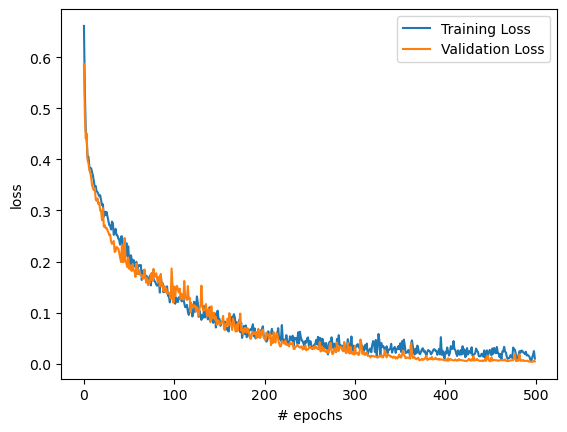

In [12]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


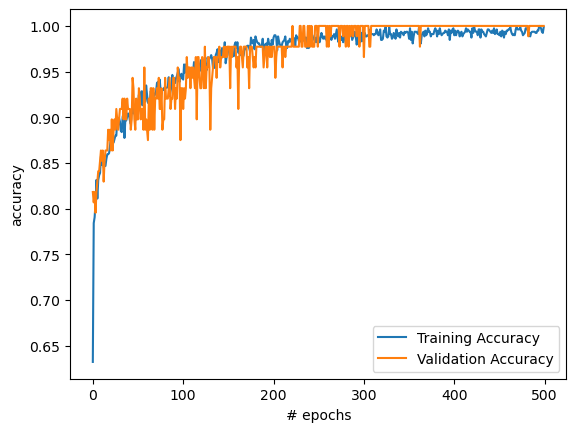

In [13]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['accuracy'], label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


In [14]:
predicted_target = model.predict(test_data)
predicted_target

4/4 [==============================] - 0s 2ms/step


array([[1.92798194e-10],
       [9.27626118e-08],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.57239898e-11],
       [1.46714016e-03],
       [3.34367741e-07],
       [4.64924099e-03],
       [3.77544275e-05],
       [9.99755561e-01],
       [9.99751866e-01],
       [9.99995708e-01],
       [1.00000000e+00],
       [8.73044257e-07],
       [9.99996722e-01],
       [1.00000000e+00],
       [1.11572677e-03],
       [9.99183297e-01],
       [9.76245642e-01],
       [9.84120250e-01],
       [2.37745536e-03],
       [2.06844852e-08],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99774218e-01],
       [5.79357675e-07],
       [5.36154676e-03],
       [9.99979019e-01],
       [1.00000000e+00],
       [9.99989748e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.51700206e-05],
       [4.16629919e-04],
       [9.99923766e-01],
       [9.99998271e-01],
       [9.98396635e-01],
       [5.39948186e-03],
       [1.07152387e-04],


In [15]:
predicted_labels=np.argmax(predicted_target,axis=1)
actual_labels=np.argmax(test_target,axis=1)

In [16]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(actual_labels,predicted_labels)
print('acc:',acc)

acc: 1.0


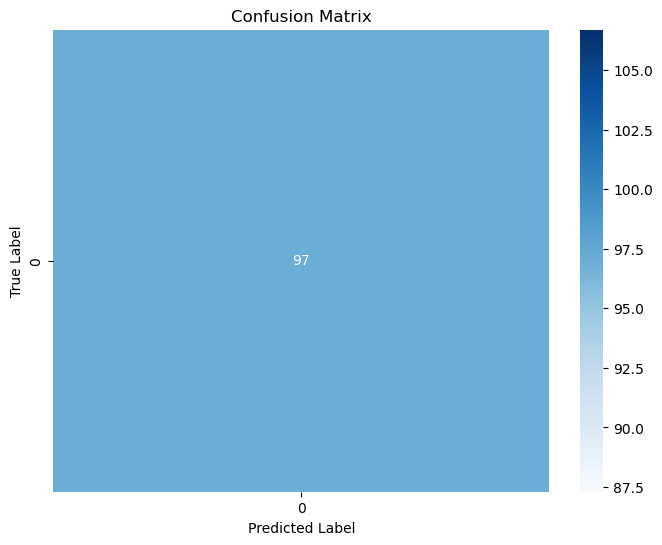

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(actual_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [17]:
print('actual:',test_target[:10].T)
print('predicted:',predicted_target[:10].T)

actual: [[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]]
predicted: [[1.9279819e-10 9.2762612e-08 1.0000000e+00 1.0000000e+00 1.0000000e+00
  1.5723990e-11 1.4671402e-03 3.3436774e-07 4.6492410e-03 3.7754427e-05]]


In [18]:
import joblib

joblib.dump(scaler_data,'scaler_data.sav')
joblib.dump(scaler_target,'scaler_target.sav')

['scaler_target.sav']

In [19]:
model.save("model.h5")

C:\Users\Acer\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
